In [1]:
%matplotlib notebook
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Declare global variables

In [2]:
m = 256
polynomial_degree = 3
coeffs = np.random.randint(low=-4, high=4, size=polynomial_degree + 1)
polynomial = np.poly1d(coeffs)
noise = np.random.rand(m) * polynomial_degree * 5
x_start = -4
x_end = 4

#### Generate dataset

In [3]:
X_train = np.linspace(x_start, x_end, m)
Y_train = polynomial(X_train) + noise

<IPython.core.display.Javascript object>


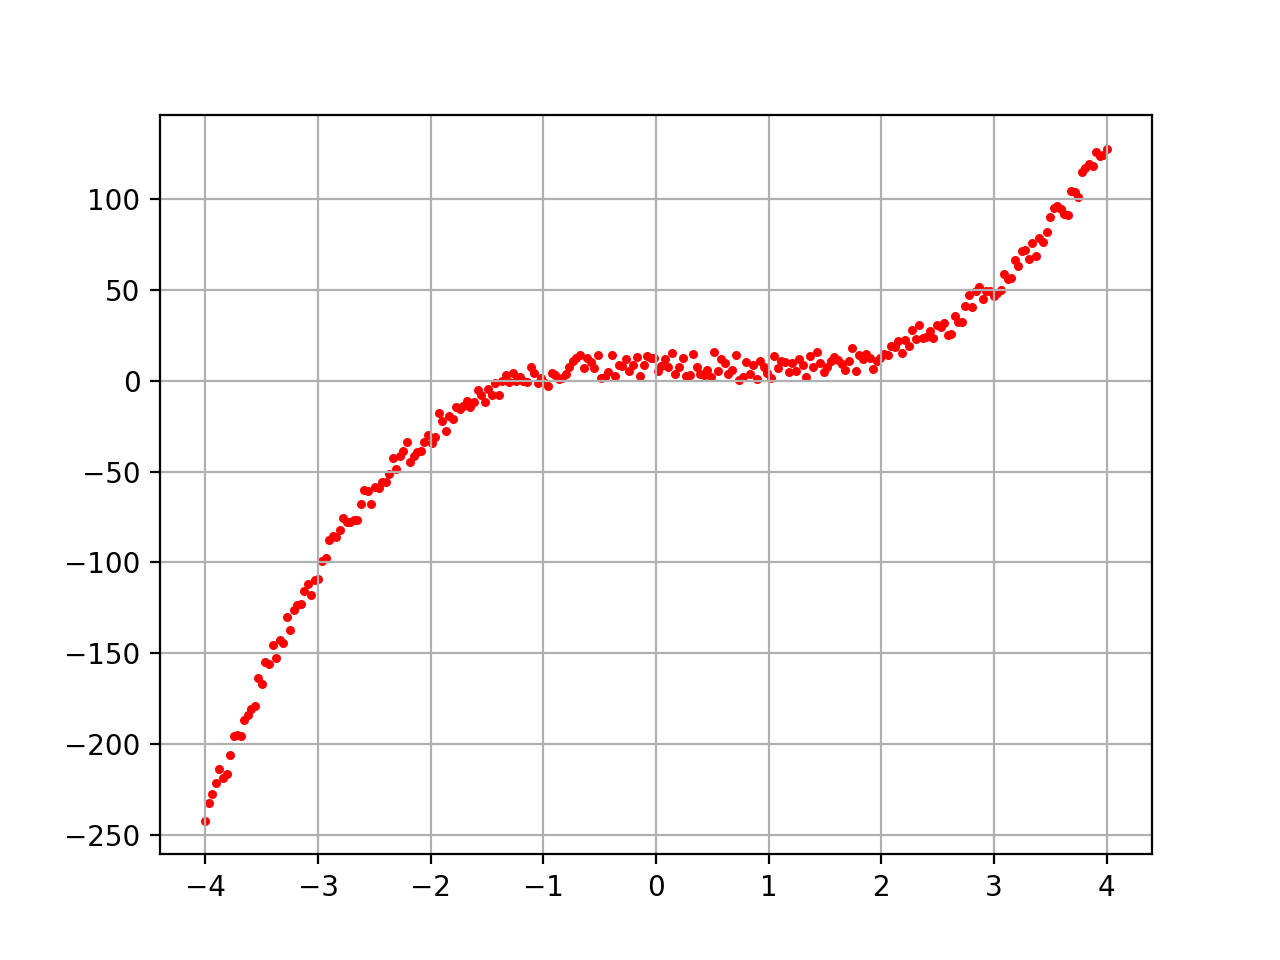

In [4]:
fig, ax = plt.subplots()
ax.grid()
scatter = ax.scatter(X_train,Y_train, s=5, c='r')

### Prepare tensorflow ecosystem

In [5]:
def init_params(model_shape):
    params = []
    for i in range(len(model_shape) - 1):
        W = tf.Variable(np.random.randn(model_shape[i+1], model_shape[i]))
        params.append(W)
    
    return params

In [6]:
# batch_size = 128
model_shape = [1, 20, 20, 1]
X = tf.placeholder(tf.float32, shape=(None, 1))
Y = tf.placeholder(tf.float32, shape=(None, 1))
# params = init_params(model_shape)

In [7]:
def forward_prop(X):
    A_1 = tf.layers.dense(X, 150, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
    A_2 = tf.layers.dense(A_1, 150, activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
    Z_3 = tf.layers.dense(A_2, 1)
    
    return Z_3

In [8]:
predictions = forward_prop(X)

In [9]:
default_sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [10]:
cost = tf.losses.mean_squared_error(labels=Y_train.reshape(-1,1), predictions=predictions)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0002).minimize(cost)

In [11]:
predictions_history = []
log_preds_step = 5
epochs = 1000
for i in range(epochs):
    [temp_cost, _] = default_sess.run([cost, optimizer], feed_dict={X: X_train.reshape(-1,1)})
    
    if i%log_preds_step == 0:
        current_prediction = default_sess.run(predictions, feed_dict={X: X_train.reshape(-1,1)})
        predictions_history.append(current_prediction)

In [12]:
def update_plot(change):
    parabola.set_ydata(predictions_history[int(iterations_slider.value / log_preds_step)]) 
#     ax.relim()
#     ax.autoscale_view()

    
iterations_slider = FloatSlider(value=0, min=0, max=epochs - 1 , step=log_preds_step)
iterations_slider.observe(update_plot, 'value')

<IPython.core.display.Javascript object>


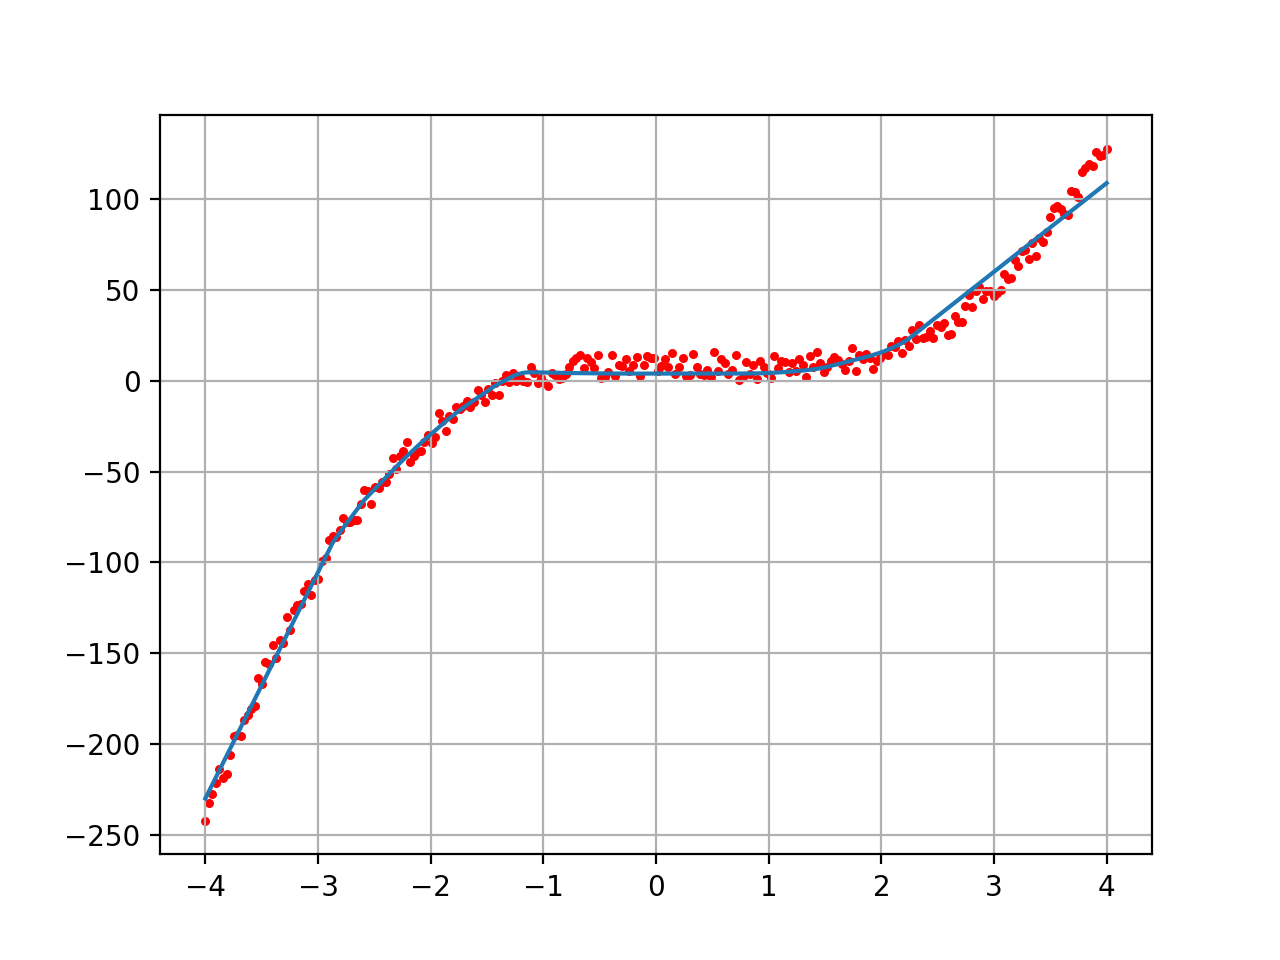

In [13]:
fig, ax = plt.subplots()
ax.grid()
scatter = ax.scatter(X_train,Y_train, s=5, c='r')
parabola, = ax.plot(X_train, predictions_history[0])

In [14]:
iterations_slider

FloatSlider(value=0.0, max=999.0, step=5.0)